### Імпорт необхідних бібліотек

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import h5py
import numpy as np

### Завантаження набору даних

In [6]:
def load_dataset():
    with h5py.File("train_catvnoncat.h5", "r") as train_dataset:
        X = np.array(train_dataset["train_set_x"][:])
        y = np.array(train_dataset["train_set_y"][:])
    return X, y

X, y = load_dataset()

### Попередня обробка

In [7]:
X = X.reshape(X.shape[0], -1) / 255.0
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Функція для тренування і тестування моделей

In [8]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = []
    for model in models:
        model.fit(X_train, y_train)
        train_acc = accuracy_score(y_train, model.predict(X_train))
        test_acc = accuracy_score(y_test, model.predict(X_test))
        results.append((model.activation, train_acc, test_acc))
    return results

### Додавання регуляризації «alpha»

In [9]:
regularization_alpha = 0.001

### 1-шарова нейромережа

In [10]:
model_1layer = MLPClassifier(
    hidden_layer_sizes=(100,), activation='relu',
    solver='sgd', max_iter=500, random_state=42,
    alpha=regularization_alpha
)
model_1layer.fit(X_train, y_train)
acc1_train = model_1layer.score(X_train, y_train)
acc1_test = model_1layer.score(X_test, y_test)

### 2-шарова нейромережа

In [11]:
activations_2 = ['identity', 'relu']
models_2layer = [
    MLPClassifier(
        hidden_layer_sizes=(3, 3), activation=act,
        solver='sgd', max_iter=500, random_state=42,
        alpha=regularization_alpha
    )
    for act in activations_2
]
results_2layer = evaluate_models(models_2layer, X_train, X_test, y_train, y_test)

### 3-шарова нейромережа

In [12]:
activations_3 = ['identity', 'relu']
models_3layer = [
    MLPClassifier(
        hidden_layer_sizes=(20, 7, 10), activation=act,
        solver='sgd', max_iter=500, random_state=42,
        alpha=regularization_alpha
    )
    for act in activations_3
]
results_3layer = evaluate_models(models_3layer, X_train, X_test, y_train, y_test)

/home/negatiw/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Порівняння з SVM

In [13]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_train = svm.score(X_train, y_train)
svm_test = svm.score(X_test, y_test)

### Виведення результатів

In [14]:
print("=== 1-шарова мережа ===")
print(f"activation: relu | Train acc: {acc1_train:.2f}, Test acc: {acc1_test:.2f}")

print("\n=== 2-шарові мережі ===")
for act, train_acc, test_acc in results_2layer:
    print(f"activation: {act} | Train acc: {train_acc:.2f}, Test acc: {test_acc:.2f}")

print("\n=== 3-шарові мережі ===")
for act, train_acc, test_acc in results_3layer:
    print(f"activation: {act} | Train acc: {train_acc:.2f}, Test acc: {test_acc:.2f}")

print("\n=== SVM ===")
print(f"Train acc: {svm_train:.2f}, Test acc: {svm_test:.2f}")

=== 1-шарова мережа ===
activation: relu | Train acc: 1.00, Test acc: 0.69

=== 2-шарові мережі ===
activation: identity | Train acc: 1.00, Test acc: 0.38
activation: relu | Train acc: 0.97, Test acc: 0.64

=== 3-шарові мережі ===
activation: identity | Train acc: 1.00, Test acc: 0.45
activation: relu | Train acc: 0.99, Test acc: 0.67

=== SVM ===
Train acc: 1.00, Test acc: 0.62


### Побудова графіка

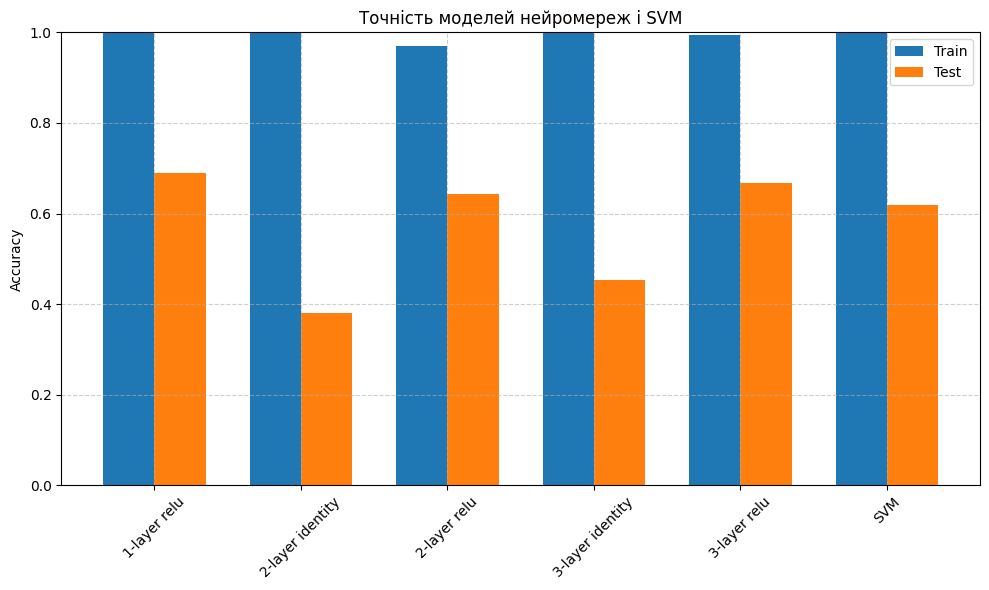

In [15]:
labels = ['1-layer relu'] + \
         [f'2-layer {r[0]}' for r in results_2layer] + \
         [f'3-layer {r[0]}' for r in results_3layer] + ['SVM']
train_scores = [acc1_train] + [r[1] for r in results_2layer] + [r[1] for r in results_3layer] + [svm_train]
test_scores = [acc1_test] + [r[2] for r in results_2layer] + [r[2] for r in results_3layer] + [svm_test]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_scores, width, label='Train')
plt.bar(x + width/2, test_scores, width, label='Test')
plt.ylabel('Accuracy')
plt.title('Точність моделей нейромереж і SVM')
plt.xticks(x, labels, rotation=45)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()